In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [2]:
data= pd.read_csv("insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data=data[['age',  'bmi',  'charges']]

In [5]:
df = pd.DataFrame(data)

In [9]:
X = df[['age', 'bmi']].values
y = df['charges'].values

In [11]:
# Add a column of ones to X for the intercept term
X = np.column_stack((np.ones(X.shape[0]), X))

# OLS formula: beta_hat = (X.T * X)^-1 * X.T * y
X_transpose = X.T
beta_hat = np.linalg.inv(X_transpose @ X) @ (X_transpose @ y)

# Extract alpha_hat (intercept) and other coefficients
alpha_hat = beta_hat[0]  # Intercept
beta_age = beta_hat[1]   # Coefficient for 'age'
beta_bmi = beta_hat[2]   # Coefficient for 'bmi'

# Display results
print(f"Alpha (Intercept): {alpha_hat:.4f}")
print(f"Beta (Coefficient for 'age'): {beta_age:.4f}")
print(f"Beta (Coefficient for 'bmi'): {beta_bmi:.4f}")

Alpha (Intercept): -6424.8046
Beta (Coefficient for 'age'): 241.9308
Beta (Coefficient for 'bmi'): 332.9651


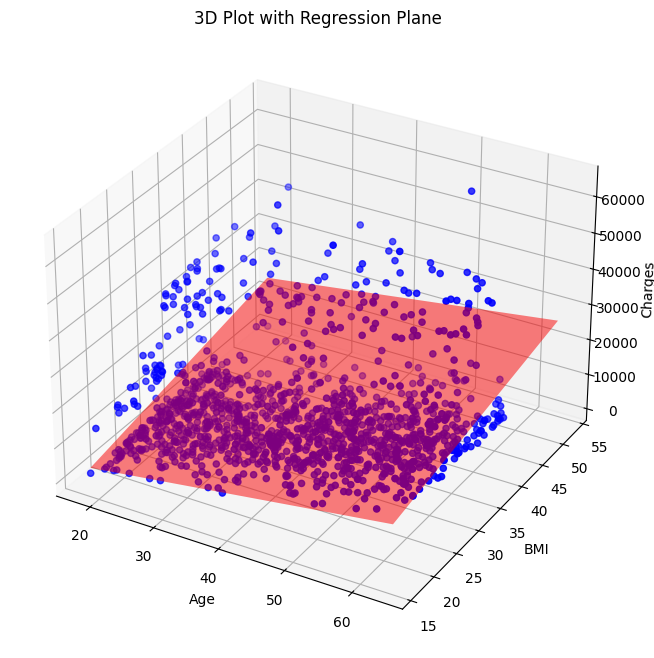

In [12]:
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data points
ax.scatter(df['age'], df['bmi'], df['charges'], color='b', label='Data points')

# Create a grid of values for 'age' and 'bmi' to plot the regression plane
age_range = np.linspace(df['age'].min(), df['age'].max(), 10)
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 10)
age_grid, bmi_grid = np.meshgrid(age_range, bmi_range)

# Calculate the charges (y-values) from the plane equation
charges_grid = alpha_hat + beta_age * age_grid + beta_bmi * bmi_grid

# Plot the regression plane
ax.plot_surface(age_grid, bmi_grid, charges_grid, alpha=0.5, rstride=100, cstride=100, color='r', label='Regression plane')

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
ax.set_title('3D Plot with Regression Plane')

plt.show()

In [13]:
# Calculate y_hat (predicted charges)
y_hat = alpha_hat + beta_age * df['age'] + beta_bmi * df['bmi']

# Display the predicted values
print(y_hat)


0        7461.606202
1        9174.180507
2       11337.105166
3        9118.883445
4       10933.012103
            ...     
1333    15983.663145
1334     8558.195089
1335    10199.712986
1336     7246.241067
1337    18012.268030
Length: 1338, dtype: float64


In [14]:
# Calculate residuals (u_hat)
u_hat = y_hat - y

# Display the residuals
print(u_hat)


0       -9423.317798
1        7448.628207
2        6887.643166
3      -12865.587165
4        7066.156903
            ...     
1333     5383.114845
1334     6352.214289
1335     8569.879486
1336     5238.296067
1337   -11129.092270
Length: 1338, dtype: float64


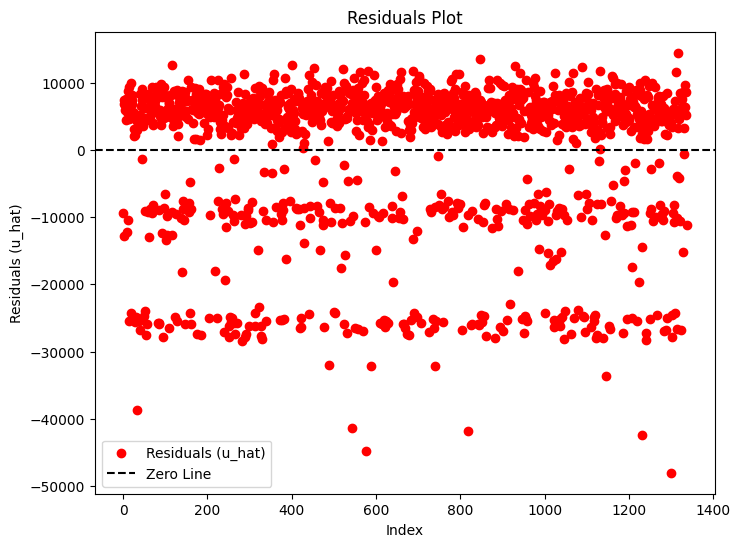

In [15]:
import matplotlib.pyplot as plt

# Plot residuals (u_hat) on a 2D plot
plt.figure(figsize=(8, 6))
plt.scatter(df.index, u_hat, color='red', label='Residuals (u_hat)')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')
plt.xlabel('Index')
plt.ylabel('Residuals (u_hat)')
plt.title('Residuals Plot')
plt.legend()
plt.show()


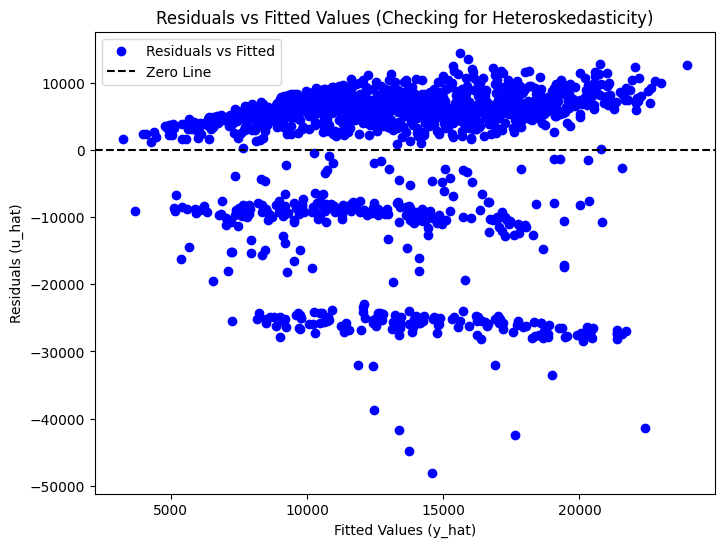

In [16]:
# Plot residuals (u_hat) against fitted values (y_hat)
plt.figure(figsize=(8, 6))
plt.scatter(y_hat, u_hat, color='blue', label='Residuals vs Fitted')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')
plt.xlabel('Fitted Values (y_hat)')
plt.ylabel('Residuals (u_hat)')
plt.title('Residuals vs Fitted Values (Checking for Heteroskedasticity)')
plt.legend()
plt.show()



### There is heteroskedasticity in the data